In [6]:
import importlib
import src.stock_bot.__main__
import src.stock_bot.strategy_backtester
from src.stock_bot.__main__ import run_back_strategy_core
importlib.reload(src.stock_bot.strategy_backtester)
importlib.reload(src.stock_bot.__main__)

<module 'src.stock_bot.__main__' from 'c:\\Users\\callu\\OneDrive\\Documents\\GitHub\\volatile_stock_trader\\src\\stock_bot\\__main__.py'>

# Stock Trading Strategy Backtesting

This notebook demonstrates the updated `run_back_strategy_core` function with three different output modes and two visualization options:

## Output Modes

1. **`equity_only`**: Returns only the final equity change percentage with no graphs
   - Use when you only need the bottom-line result
   - Fastest execution
   - Example: `output_mode="equity_only"`

2. **`equity_curve`**: Shows only the equity change over time
   - Clean visualization focusing on performance
   - Shows how your portfolio value changes throughout the period
   - Example: `output_mode="equity_curve"`

3. **`full`**: Complete analysis with all indicators
   - Stock price with buy/sell signals and Bollinger Bands
   - Equity curve over time
   - MACD indicator
   - Rate of Change (ROC) indicator
   - Example: `output_mode="full"`

## Visualization Options

- **Dashboard (Default)**: Interactive web dashboard at http://127.0.0.1:8050/
  - Better for detailed analysis and interaction
  - Synchronized chart zooming and panning
  - Use: `use_notebook_plots=False` (default)

- **Notebook Plots**: Matplotlib plots embedded in notebook
  - Better for documentation and static analysis
  - Plots appear directly in notebook cells
  - Use: `use_notebook_plots=True`

## Function Parameters

```python
run_back_strategy_core(
    symbol,           # Stock symbol (e.g., "AAPL")
    macd_fast,        # MACD fast period (default: 12)
    macd_slow,        # MACD slow period (default: 26) 
    macd_signal,      # MACD signal period (default: 9)
    rsi_period,       # RSI period (default: 14)
    roc_period,       # Rate of Change period (default: 5)
    ema_mom_period,   # EMA momentum period (default: 20)
    period,           # Data period (e.g., "60d")
    interval,         # Data interval (e.g., "15m")
    final_equity_only=False,  # Legacy parameter
    plot=True,        # Whether to show plots
    notebook=False,   # Legacy parameter (auto-enables notebook plots if True)
    output_mode="full",  # Choose: "equity_only", "equity_curve", or "full"
    use_notebook_plots=False  # True for matplotlib, False for dashboard (default)
)
```

=== Testing Multi-Symbol Analysis (Balanced Volatile Stock Strategy) ===
🔍 Analyzing 4 symbols: IONQ, AAPL, MSFT, GOOGL

[1/4] Analyzing IONQ...


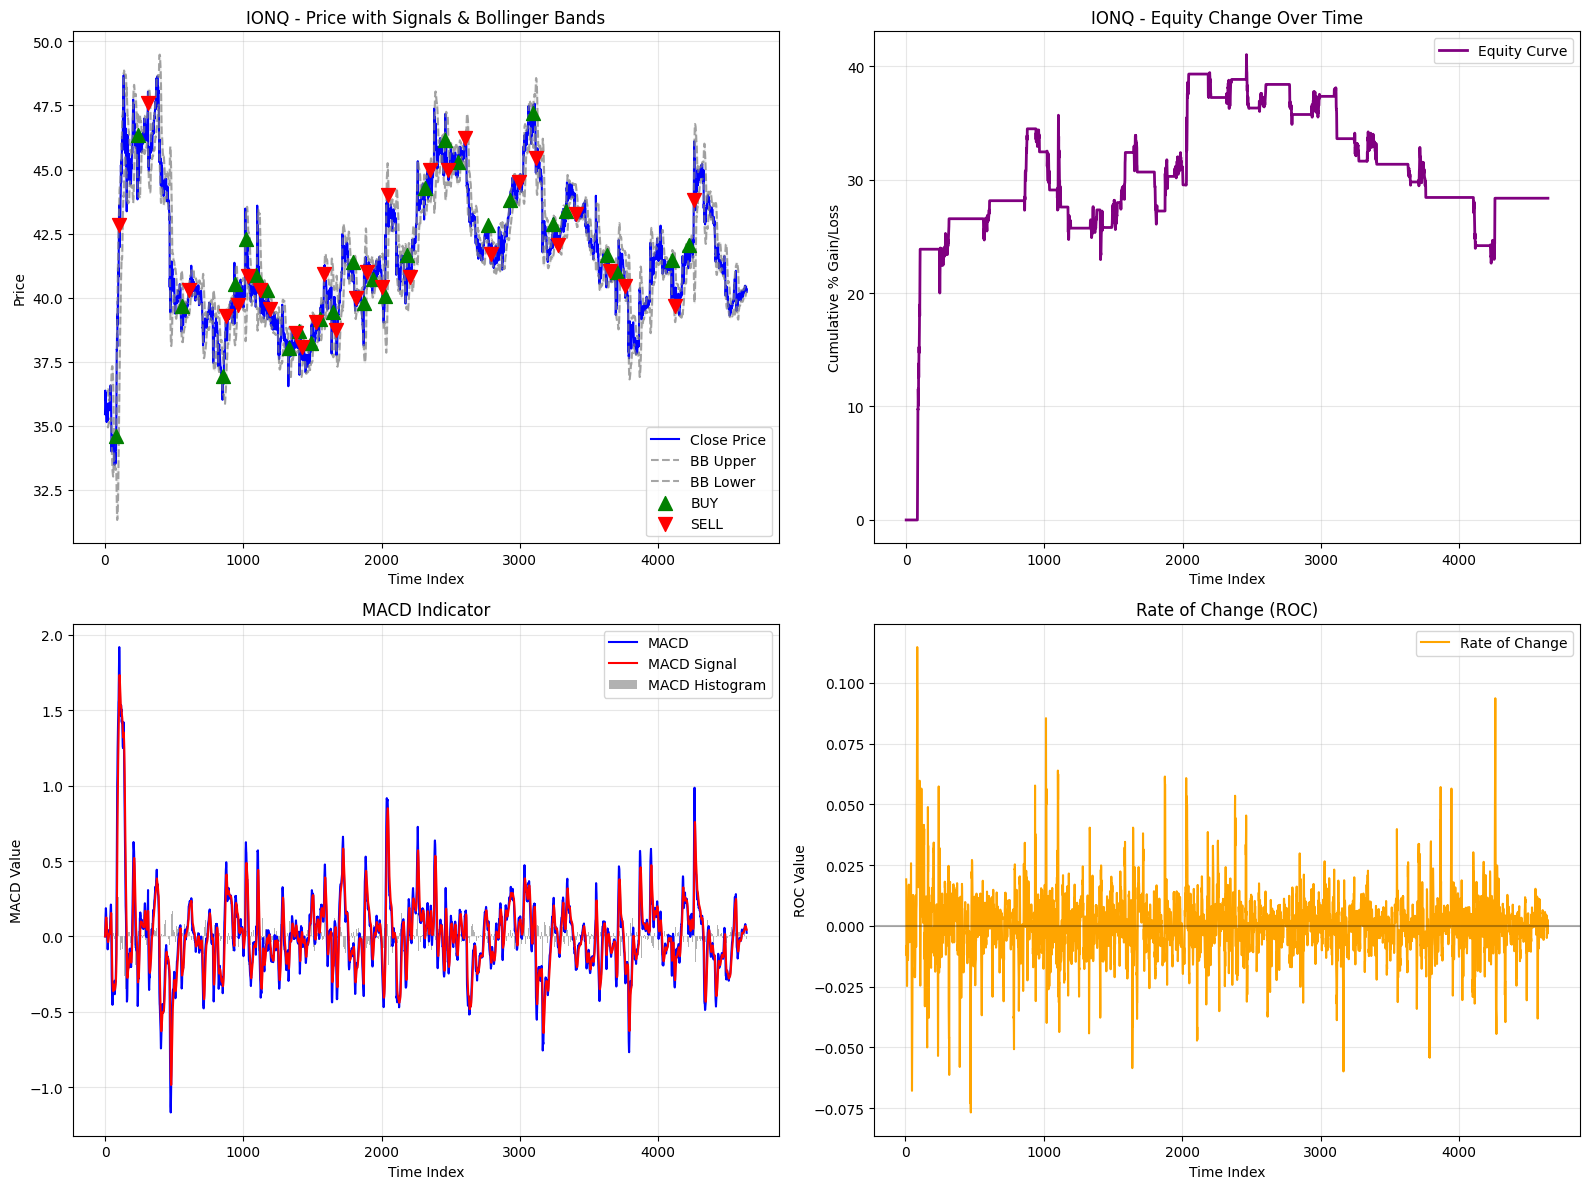


[2/4] Analyzing AAPL...


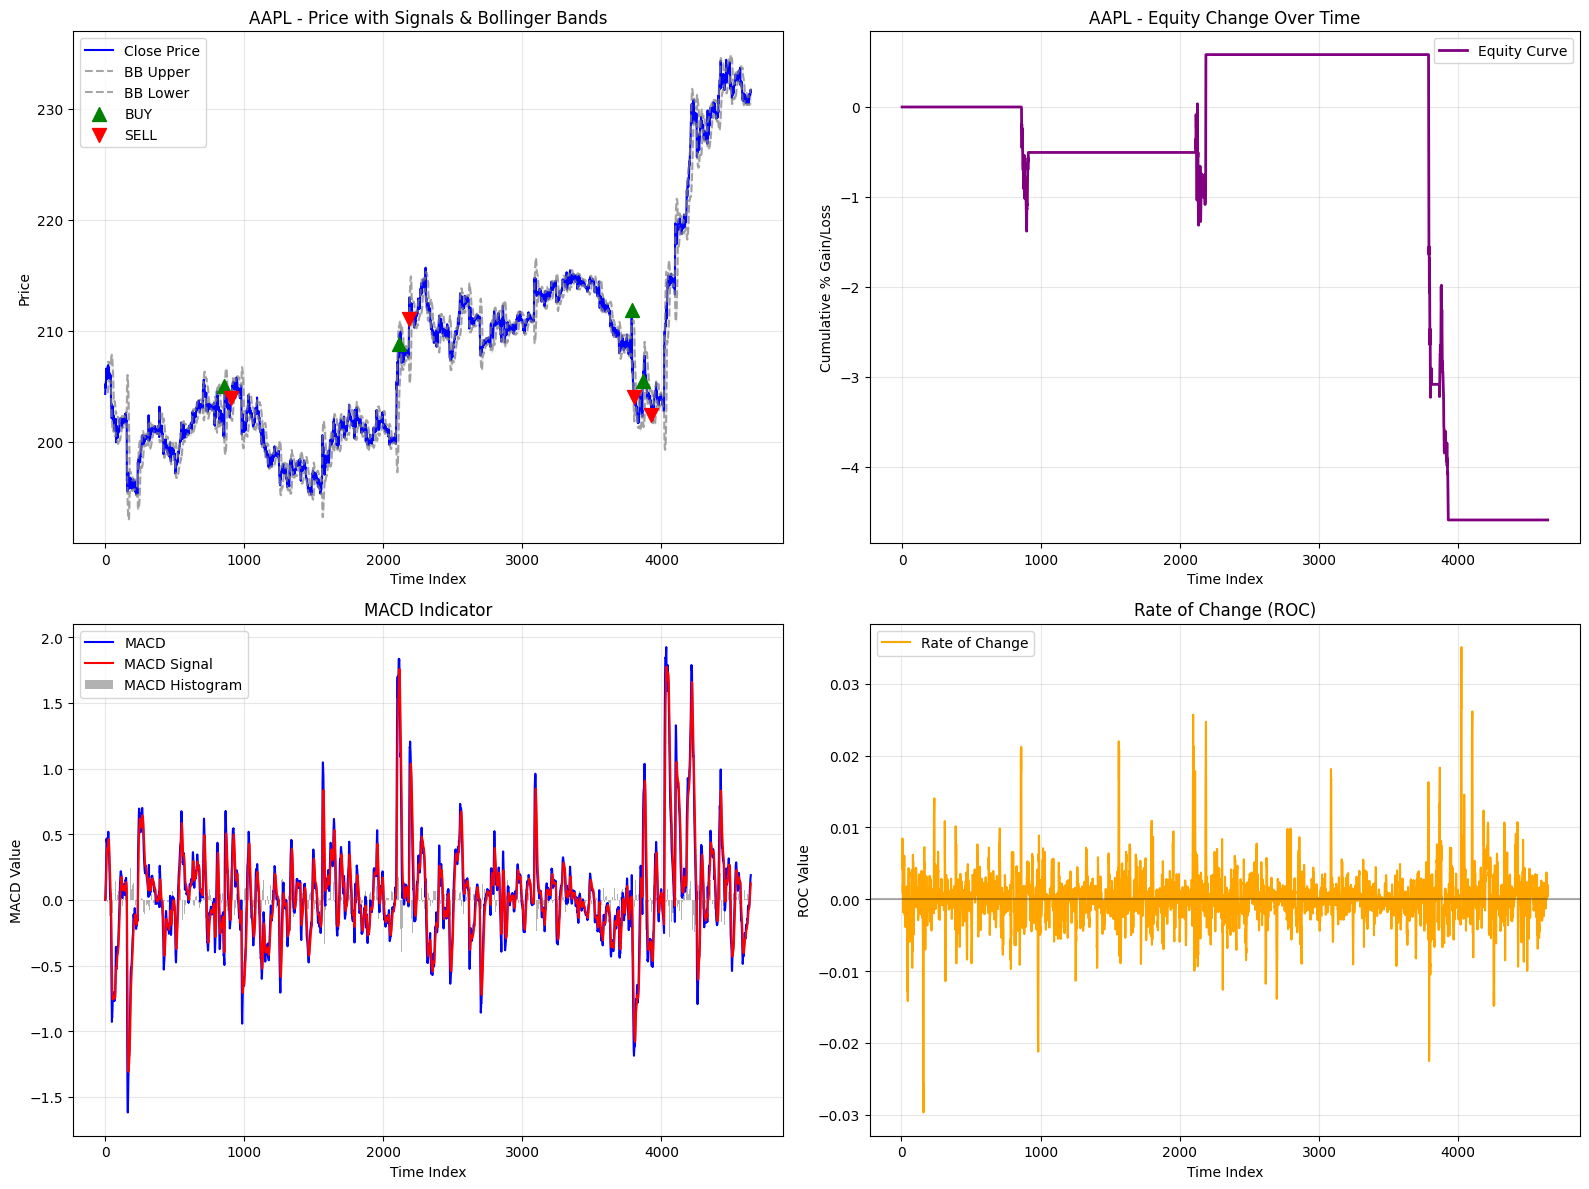


[3/4] Analyzing MSFT...


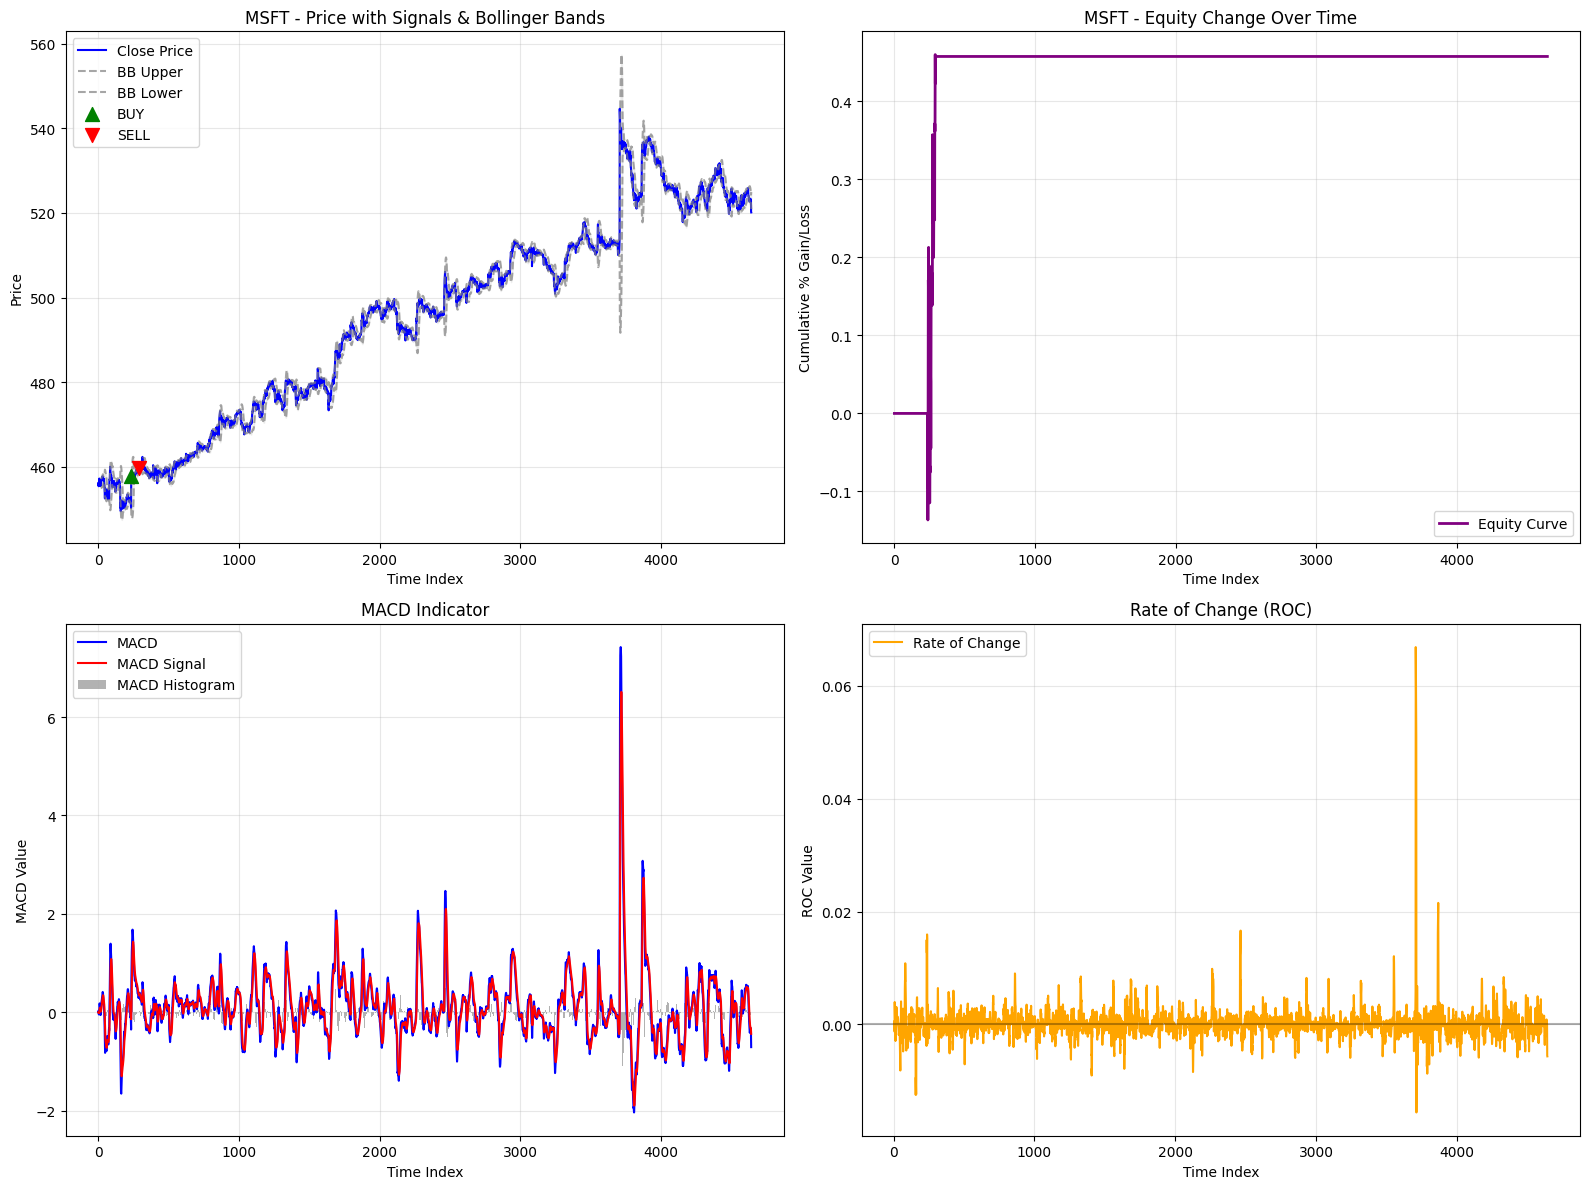


[4/4] Analyzing GOOGL...


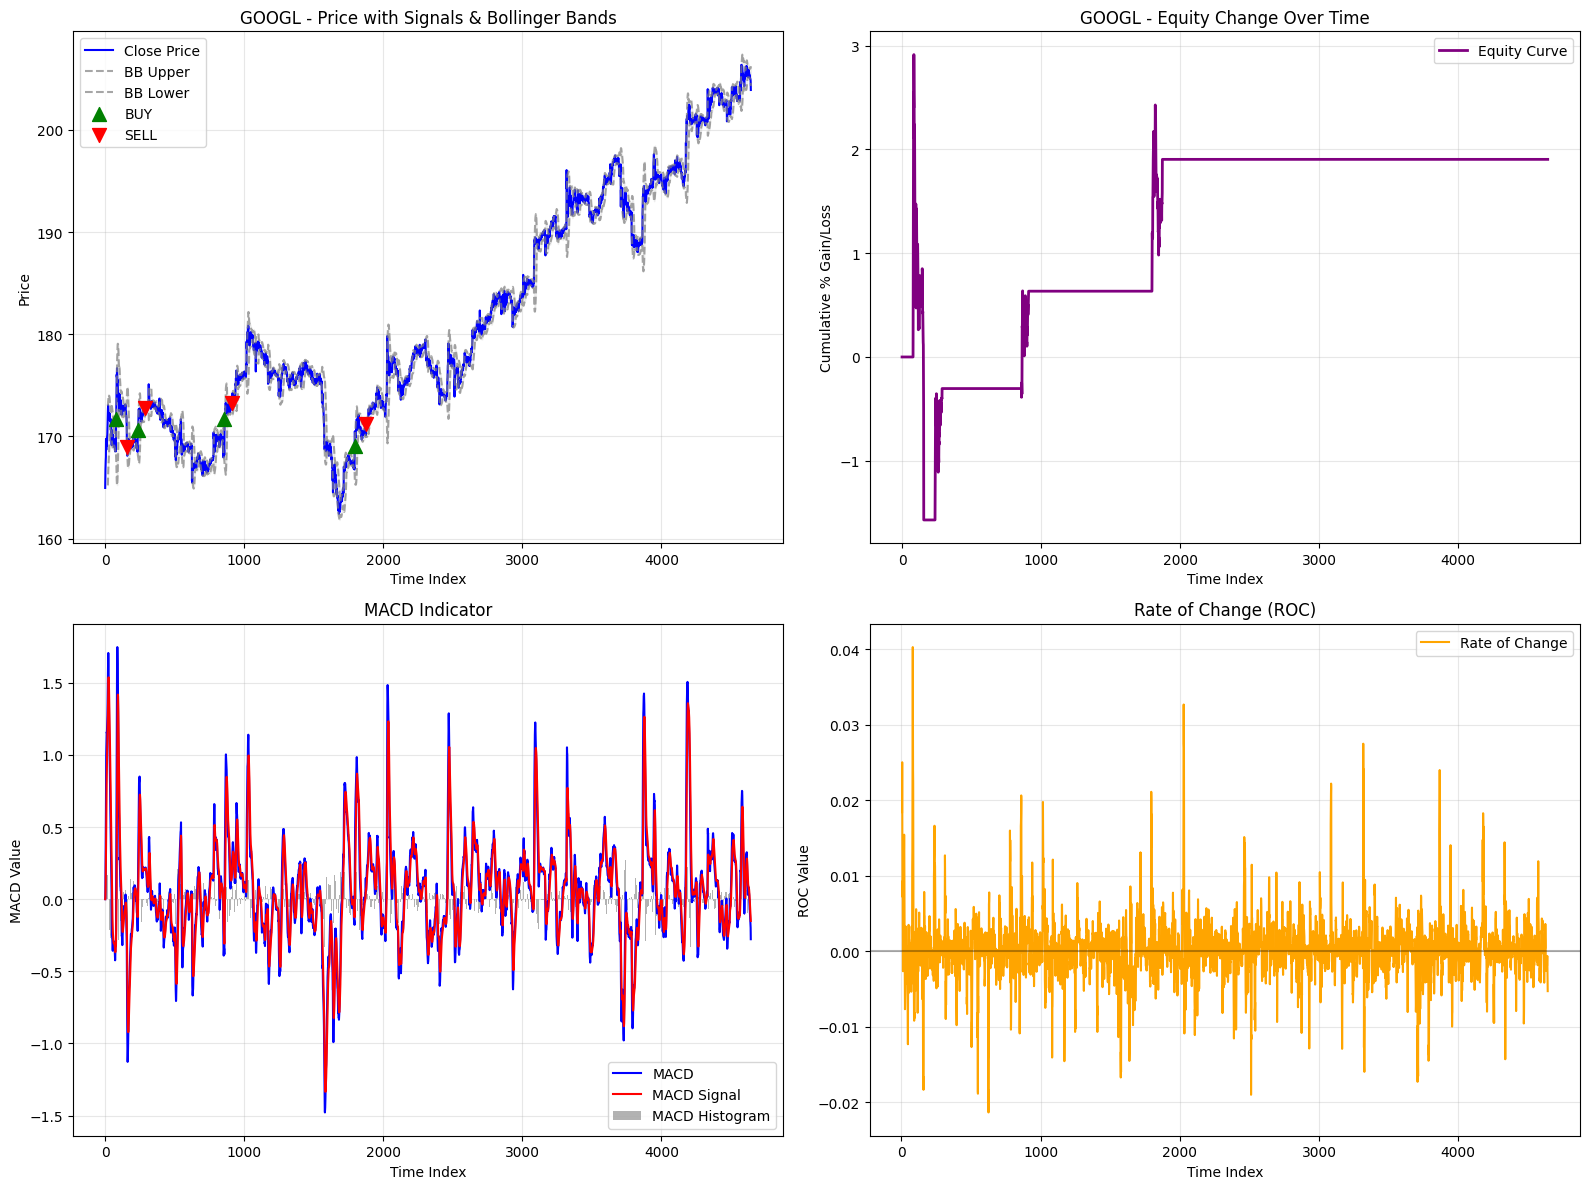


📊 MULTI-SYMBOL COMPARISON RESULTS
Rank   Symbol   Equity Change   Performance
--------------------------------------------------
1      IONQ       +28.36%        🟢 Profit
2      GOOGL       +1.90%        🟢 Profit
3      MSFT        +0.46%        🟢 Profit
4      AAPL        -4.59%        🔴 Loss
--------------------------------------------------
📈 Average Return: +6.53%
🎯 Profitable Stocks: 3/4 (75.0%)
🏆 Best Performer: IONQ (+28.36%)
📉 Worst Performer: AAPL (-4.59%)


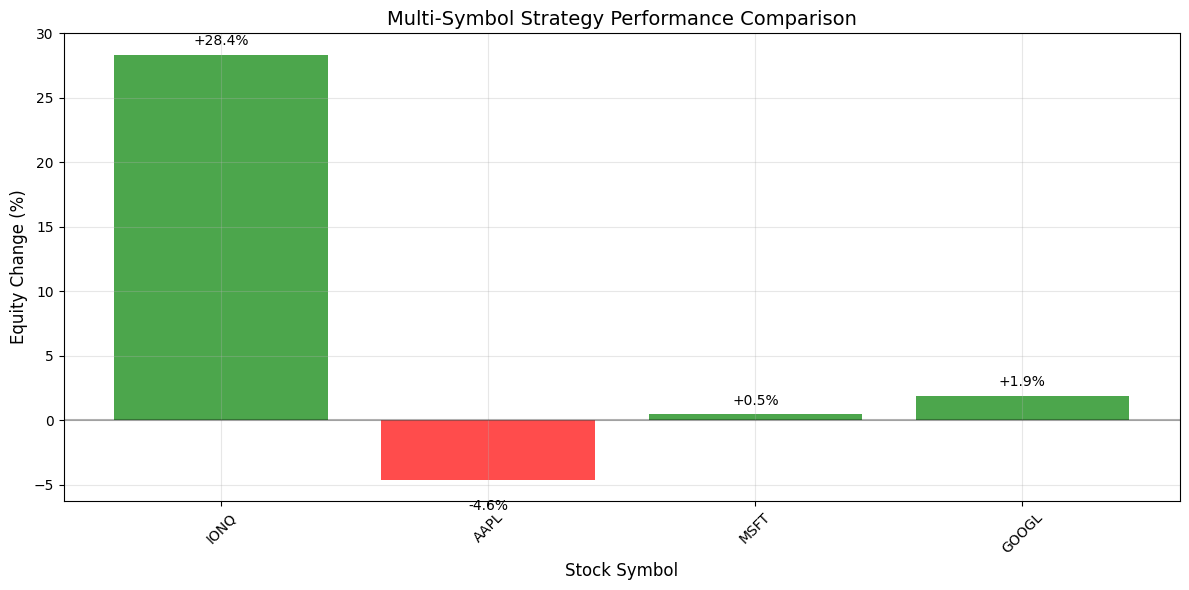


Balanced volatile stock analysis result: {'IONQ': np.float64(28.355758223353682), 'AAPL': np.float64(-4.593722774336131), 'MSFT': np.float64(0.4575853032829645), 'GOOGL': np.float64(1.9034656562886672)}


In [7]:
# Test Multi-Symbol Analysis with Balanced Volatile Stock Parameters
print("=== Testing Multi-Symbol Analysis (Balanced Volatile Stock Strategy) ===")
symbols = ["IONQ", "AAPL", "MSFT", "GOOGL"]

# Balanced parameters to reduce over-trading while capturing key movements
# - Moderate MACD (10,24,8) for balanced signal detection
# - Moderate RSI (12) for less noise but still responsive
# - Moderate ROC (4) to catch momentum without over-sensitivity
# - Moderate EMA (18) for balanced trend detection
result = run_back_strategy_core(
    symbols, 
    macd_fast=12,    # Slightly faster than default but not too aggressive
    macd_slow=26,    # Slightly faster than default 26 but more stable than 21
    macd_signal=9,   # Balanced signal confirmation
    rsi_period=14,   # Less sensitive than 10, more responsive than 14
    roc_period=5,    # Balanced momentum detection
    ema_mom_period=20,  # Balanced trend detection
    period="60d",    # Keep same period
    interval="5m",   # Keep same interval
    output_mode="full",
    use_notebook_plots=True
)
print(f"\nBalanced volatile stock analysis result: {result}")

# Note: These balanced parameters aim to:
# 1. Reduce over-trading by being less sensitive to short-term noise
# 2. Still capture important price movements with moderate responsiveness
# 3. Find the sweet spot between too aggressive and too conservative